<span style="color:#87cefa; font-size:200%">Plots for Summery 2/4 2022</span> 

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.special import rel_entr
import pickle
from mpl_toolkits.mplot3d import axes3d
from scipy.ndimage.filters import gaussian_filter

import matplotlib.patches as patches

import Mesh_data
import Mesh_data_server
import seaborn
import fort44_reader as fort

al_new_g_sep_out_target_dist = Mesh_data_server.co_sep_out_target_dist
al_newg_newmesh_facing = np.load("./gs_new_g_SAS.npy")

eV = 1.60218e-19

In [151]:
ny = 36
nx = 96
co_mesh = np.load("./conv_geo_mesh_center.npy")
co_mesh_x = np.load("./conv_geo_mesh_x.npy")
co_mesh_y = np.load("./conv_geo_mesh_y.npy")

al_mesh = np.load("./al_geo_mesh_center.npy")
al_mesh_x = np.load("./al_geo_mesh_x.npy")
al_mesh_y = np.load("./al_geo_mesh_y.npy")

co_facing = np.load("./gs_b2fgmtry.npy")
al_facing = np.load("./gs_b2fgmtry_al.npy")


co_new_mesh = np.load("./new_mesh_co_geo_mesh_center.npy")
co_new_mesh_x = np.load("./new_mesh_co_geo_mesh_x.npy")
co_new_mesh_y = np.load("./new_mesh_co_geo_mesh_y.npy")
co_newmesh_facing = np.load("./gs_new_mesh_co.npy")


al_new_mesh = np.load("./new_mesh_al_geo_mesh_center.npy")
al_new_mesh_x = np.load("./new_mesh_al_geo_mesh_x.npy")
al_new_mesh_y = np.load("./new_mesh_al_geo_mesh_y.npy")
al_newmesh_facing = np.load("./gs_new_mesh_al.npy")


newSAS_mesh = np.load("./new_SAS_geo_mesh_center.npy")
newSAS_mesh_x = np.load("./new_SAS_geo_mesh_y.npy")
newSAS_mesh_y = np.load("./new_SAS_geo_mesh_y.npy")
newSAS_facing = np.load("./gs_new_SAS.npy")

al_new_g_mesh = np.load("ng_geo_mesh_center.npy")
al_new_g_mesh_x = np.load("ng_geo_mesh_x.npy")
al_new_g_mesh_y = np.load("ng_geo_mesh_y.npy")

al_new_g_facing = np.load("./gs_new_g_SAS.npy")




print(np.shape(co_facing))
print(np.shape(al_facing))
def co_distance_center(first_point, second_point):
    x_range = x_co_meshinfo[first_point[1],first_point[0]]-x_co_meshinfo[second_point[1],second_point[0]]
    y_range = y_co_meshinfo[first_point[1],first_point[0]]-y_co_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def co_distance_point(first_point, second_point):
    x_range = co_mesh_x[first_point[2],first_point[1],first_point[0]]-co_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = co_mesh_y[first_point[2],first_point[1],first_point[0]]-co_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_center(first_point, second_point):
    x_range = x_al_meshinfo[first_point[1],first_point[0]]-x_al_meshinfo[second_point[1],second_point[0]]
    y_range = y_al_meshinfo[first_point[1],first_point[0]]-y_al_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_point(first_point, second_point):
    x_range = al_mesh_x[first_point[2],first_point[1],first_point[0]]-al_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = al_mesh_y[first_point[2],first_point[1],first_point[0]]-al_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

#new geo files
def co_new_mesh_distance_center(first_point, second_point):
    x_range = x_co_new_meshinfo[first_point[1],first_point[0]]-x_co_new_meshinfo[second_point[1],second_point[0]]
    y_range = y_co_new_meshinfo[first_point[1],first_point[0]]-y_co_new_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result
def co_new_mesh_distance_point(first_point, second_point):
    x_range = co_new_mesh_x[first_point[2],first_point[1],first_point[0]]-co_new_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = co_new_mesh_y[first_point[2],first_point[1],first_point[0]]-co_new_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result


def al_new_mesh_distance_center(first_point, second_point):
    x_range = x_al_new_meshinfo[first_point[1],first_point[0]]-x_al_new_meshinfo[second_point[1],second_point[0]]
    y_range = y_al_new_meshinfo[first_point[1],first_point[0]]-y_al_new_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_new_mesh_distance_point(first_point, second_point):
    x_range = al_new_mesh_x[first_point[2],first_point[1],first_point[0]]-al_new_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = al_new_mesh_y[first_point[2],first_point[1],first_point[0]]-al_new_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result


def newSAS_distance_center(first_point, second_point):
    x_range = x_newSAS_meshinfo[first_point[1],first_point[0]]-x_newSAS_meshinfo[second_point[1],second_point[0]]
    y_range = y_newSAS_meshinfo[first_point[1],first_point[0]]-y_newSAS_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def newSAS_distance_point(first_point, second_point):
    x_range = newSAS_mesh_x[first_point[2],first_point[1],first_point[0]]-newSAS_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = newSAS_mesh_y[first_point[2],first_point[1],first_point[0]]-newSAS_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result




def neutral_pressure(na,ti):
    pr = na[0,:,:]*ti[:,:]+ na[0,:,:]*ti[:,:]+ na[2,:,:]*ti[:,:]+na[2,:,:]*ti[:,:]+na[9,:,:]*ti[:,:]
    return pr
    
dumx_co_meshinfo = co_mesh[:,0]
dumy_co_meshinfo = co_mesh[:,1]
x_co_meshinfo = dumx_co_meshinfo.reshape(ny+2,nx+2)
y_co_meshinfo = dumy_co_meshinfo.reshape(ny+2,nx+2)

dumx_al_meshinfo = al_mesh[:,0]
dumy_al_meshinfo = al_mesh[:,1]
x_al_meshinfo = dumx_al_meshinfo.reshape(ny+2,nx+2)
y_al_meshinfo = dumy_al_meshinfo.reshape(ny+2,nx+2)

dumx_co_new_meshinfo = co_new_mesh[:,0]
dumy_co_new_meshinfo = co_new_mesh[:,1]
x_co_new_meshinfo = dumx_co_new_meshinfo.reshape(ny+2,nx+2)
y_co_new_meshinfo = dumy_co_new_meshinfo.reshape(ny+2,nx+2)

dumx_al_new_meshinfo = al_new_mesh[:,0]
dumy_al_new_meshinfo = al_new_mesh[:,1]
x_al_new_meshinfo = dumx_al_new_meshinfo.reshape(ny+2,nx+2)
y_al_new_meshinfo = dumy_al_new_meshinfo.reshape(ny+2,nx+2)

dumx_newSAS_meshinfo = newSAS_mesh[:,0]
dumy_newSAS_meshinfo = newSAS_mesh[:,1]
x_newSAS_meshinfo = dumx_newSAS_meshinfo.reshape(ny+2,nx+2)
y_newSAS_meshinfo = dumy_newSAS_meshinfo.reshape(ny+2,nx+2)


#po_dumx_meshinfo = convmesh[:,0]
#po_dumy_meshinfo = convmesh[:,1]
#po_x_meshinfo = dumx_meshinfo.reshape(4,ny+2,nx+2)
#po_y_meshinfo = dumy_meshinfo.reshape(4,ny+2,nx+2)
co_sep_out_target = np.zeros(2)
co_sep_out_target[0] = co_mesh_x[1,18,96]
co_sep_out_target[1] = co_mesh_y[1,18,96]
co_mesh_x_cen = np.sum(co_mesh_x, axis = 0)/4
co_mesh_y_cen = np.sum(co_mesh_y, axis = 0)/4

al_sep_out_target = np.zeros(2)
al_sep_out_target[0] = al_mesh_x[1,18,96]
al_sep_out_target[1] = al_mesh_y[1,18,96]
al_mesh_x_cen = np.sum(al_mesh_x, axis = 0)/4
al_mesh_y_cen = np.sum(al_mesh_y, axis = 0)/4

co_new_mesh_sep_out_target = np.zeros(2)
co_new_mesh_sep_out_target[0] = co_mesh_x[1,18,96]
co_new_mesh_sep_out_target[1] = co_mesh_y[1,18,96]
co_new_mesh_x_cen = np.sum(co_mesh_x, axis = 0)/4
co_new_mesh_y_cen = np.sum(co_mesh_y, axis = 0)/4

al_new_mesh_sep_out_target = np.zeros(2)
al_new_mesh_sep_out_target[0] = al_new_mesh_x[1,18,96]
al_new_mesh_sep_out_target[1] = al_new_mesh_y[1,18,96]
al_new_mesh_x_cen = np.sum(al_new_mesh_x, axis = 0)/4
al_new_mesh_y_cen = np.sum(al_new_mesh_y, axis = 0)/4

newSAS_sep_out_target = np.zeros(2)
newSAS_sep_out_target[0] = newSAS_mesh_x[1,18,96]
newSAS_sep_out_target[1] = newSAS_mesh_y[1,18,96]
newSAS_mesh_x_cen = np.sum(newSAS_mesh_x, axis = 0)/4
newSAS_mesh_y_cen = np.sum(newSAS_mesh_y, axis = 0)/4



X_point = []



co_sep_out_target_dist = np.zeros(ny+2)
co_sep_in_target_dist = np.zeros(ny+2)     
co_sep_out_midplane_dist = np.zeros(ny+2)
co_sep_in_midplane_dist = np.zeros(ny+2)

co_new_mesh_sep_out_midplane_dist = np.zeros(ny+2)
co_new_mesh_sep_in_midplane_dist = np.zeros(ny+2)
co_new_mesh_sep_out_target_dist = np.zeros(ny+2)
co_new_mesh_sep_in_target_dist = np.zeros(ny+2)

al_sep_out_midplane_dist = np.zeros(ny+2)
al_sep_in_midplane_dist = np.zeros(ny+2)
al_sep_out_target_dist = np.zeros(ny+2)
al_sep_in_target_dist = np.zeros(ny+2)


al_new_mesh_sep_out_midplane_dist = np.zeros(ny+2)
al_new_mesh_sep_in_midplane_dist = np.zeros(ny+2)
al_new_mesh_sep_out_target_dist = np.zeros(ny+2)
al_new_mesh_sep_in_target_dist = np.zeros(ny+2)

newSAS_sep_out_midplane_dist = np.zeros(ny+2)
newSAS_sep_in_midplane_dist = np.zeros(ny+2)
newSAS_sep_out_target_dist = np.zeros(ny+2)
newSAS_sep_in_target_dist = np.zeros(ny+2)



conv_Xpt_dist = np.zeros(20)
al_Xpt_dist = np.zeros(20)






for i in range(ny+2):
    co_sep_out_midplane_dist[i] = co_distance_point([52,i,1],[52,18,1])
    co_sep_in_midplane_dist[i]  = co_distance_point([29,i,1],[29,18,1])
    co_sep_out_target_dist[i] = co_distance_point([96,i,1],[96,18,1])
    co_sep_in_target_dist[i] = co_distance_point([1,i,1],[1,18,1])


    co_new_mesh_sep_out_midplane_dist[i] = co_new_mesh_distance_point([52,i,1],[52,18,1])
    co_new_mesh_sep_in_midplane_dist[i]  = co_new_mesh_distance_point([29,i,1],[29,18,1])
    co_new_mesh_sep_out_target_dist[i] = co_new_mesh_distance_point([96,i,1],[96,18,1])
    co_new_mesh_sep_in_target_dist[i]  = co_new_mesh_distance_point([1,i,1],[1,18,1])

    al_sep_out_midplane_dist[i] = al_distance_point([52,i,1],[52,18,1])
    al_sep_in_midplane_dist[i]  = al_distance_point([29,i,1],[29,18,1])
    al_sep_out_target_dist[i] = al_distance_point([96,i,1],[96,18,1])
    al_sep_in_target_dist[i]  = al_distance_point([1,i,1],[1,18,1])


    al_new_mesh_sep_out_midplane_dist[i] = al_new_mesh_distance_point([52,i,1],[52,18,1])
    al_new_mesh_sep_in_midplane_dist[i]  = al_new_mesh_distance_point([29,i,1],[29,18,1])
    al_new_mesh_sep_out_target_dist[i] = al_new_mesh_distance_point([96,i,1],[96,18,1])
    al_new_mesh_sep_in_target_dist[i]  = al_new_mesh_distance_point([1,i,1],[1,18,1])
    

#    newSAS_sep_out_midplane_dist[i] = newSAS_distance_point([52,i,1],[52,18,1])
#    newSAS_sep_in_midplane_dist[i]  = newSAS_distance_point([29,i,1],[29,18,1])
#    newSAS_sep_out_target_dist[i] = newSAS_distance_point([96,i,1],[96,18,1])
#    newSAS_sep_in_target_dist[i]  = newSAS_distance_point([1,i,1],[1,18,1])
    
    if i<18:
        co_sep_out_midplane_dist[i] = -co_sep_out_midplane_dist[i]
        co_sep_in_midplane_dist[i]  = -co_sep_in_midplane_dist[i]
        co_sep_out_target_dist[i] = -co_sep_out_target_dist[i]
        co_sep_in_target_dist[i] = -co_sep_in_target_dist[i]

        co_new_mesh_sep_out_midplane_dist[i] = -co_new_mesh_sep_out_midplane_dist[i]
        co_new_mesh_sep_in_midplane_dist[i]  = -co_new_mesh_sep_in_midplane_dist[i]
        co_new_mesh_sep_out_target_dist[i] = -co_new_mesh_sep_out_target_dist[i]
        co_new_mesh_sep_in_target_dist[i] = -co_new_mesh_sep_in_target_dist[i]

        
        al_sep_out_midplane_dist[i] = -al_sep_out_midplane_dist[i]
        al_sep_in_midplane_dist[i] = -al_sep_in_midplane_dist[i]
        al_sep_out_target_dist[i] = -al_sep_out_target_dist[i]
        al_sep_in_target_dist[i] = -al_sep_in_target_dist[i]
        
        al_new_mesh_sep_out_midplane_dist[i] = -al_new_mesh_sep_out_midplane_dist[i]
        al_new_mesh_sep_in_midplane_dist[i] = -al_new_mesh_sep_in_midplane_dist[i]
        al_new_mesh_sep_out_target_dist[i] = -al_new_mesh_sep_out_target_dist[i]
        al_new_mesh_sep_in_target_dist[i] = -al_new_mesh_sep_in_target_dist[i]

        
newSAS_sep_out_midplane_dist = Mesh_data.newSAS_sep_out_midplane_dist
newSAS_sep_in_midplane_dist = Mesh_data.newSAS_sep_in_midplane_dist
newSAS_sep_out_target_dist = Mesh_data.newSAS_sep_out_target_dist
newSAS_sep_in_target_dist = Mesh_data.newSAS_sep_in_target_dist
        




    
for i in range(20):
    conv_Xpt_dist[i] = co_distance_center([78,18],[78+i,18])

    
    
for i in range(20):
    al_Xpt_dist[i] = al_distance_center([78,18],[78+i,18])
print(conv_Xpt_dist)
print(al_Xpt_dist)


# def total_pressure(ne,te,na,ti):
#     pr = ne[:,:]*te[:,:] + na[1,:,:]*ti[:,:] +np.sum(na[2:9,:,:]*ti[:,:],axis = 0)+np.sum(na[9:,:,:]*ti[:,:],axis = 0)
#     return pr


def total_neutral_pressure(ne,te,na,ti,ua):
    pr = ne[:,:]*te[:,:] + na[1,:,:]*ti[:,:] +np.sum(na[2:9,:,:]*ti[:,:],axis = 0)+np.sum(na[9:,:,:]*ti[:,:],axis = 0)+ne[:,:]*te[:,:] + na[1,:,:]*ua[1,:,:]*ua[1,:,:] +np.sum(na[2:9,:,:]*ua[2:9,:,:]*ua[2:9,:,:],axis = 0)+np.sum(na[9:,:,:]*ua[9:,:,:]*ua[9:,:,:],axis = 0)
    return pr


def total_pressure(ne,te,na,ti,ua):

    mass_indes = np.array([3.3435837724*10**(-27),3.3435837724*10**(-27),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),1.9944733*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26),3.3509177*10**(-26)])
#    mass_indes = np.transpose(mass_indes)
    pr = ne[:,:]*te[:,:] 
    impor = na[:,:,:]*ua[:,:,:]*ua[:,:,:]
    for i in range(np.shape(mass_indes)[0]):
        pr= pr+impor[i,:,:]*mass_indes[i]+na[i,:,:]*ti[:,:]
    return pr


(3, 38, 98)
(3, 38, 98)
[0.         0.02024052 0.0430307  0.06776496 0.09401868 0.12139181
 0.14949061 0.17792684 0.2063151  0.23427089 0.26140689 0.28732694
 0.31161978 0.33386324 0.35365201 0.37062728 0.38446747 0.39484765
 0.40141755 0.40372746]
[0.         0.0254457  0.05394852 0.08486258 0.11766655 0.15185898
 0.18694875 0.22245149 0.25788705 0.29277786 0.3266464  0.35900945
 0.3893695  0.41720759 0.44200125 0.46327177 0.48060219 0.49359053
 0.50180683 0.50469472]


(38, 98)
930.4488010495745


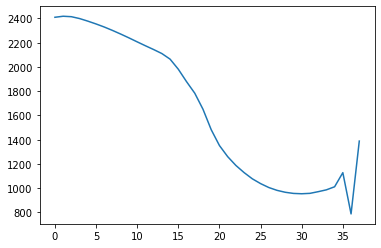

In [152]:

ne_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/ne_b2fplasmf_co_8MW_Ne_0.npy")
te_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_8MW_Ne_0.npy")
na_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/na_b2fplasmf_co_8MW_Ne_0.npy")
ti_b2fplasmf_co_8MW_Ne_0=np.load("./data_Heating_Geo_sput/ti_b2fplasmf_co_8MW_Ne_0.npy")
ua_b2fplasmf_co_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/ua_b2fplasmf_co_8MW_Ne_0.npy")

pr_co_8MW = total_neutral_pressure(ne_b2fplasmf_co_8MW_Ne_0,te_b2fplasmf_co_8MW_Ne_0,na_b2fplasmf_co_8MW_Ne_0,ti_b2fplasmf_co_8MW_Ne_0,ua_b2fplasmf_co_8MW_Ne_0)

to_pr_co_8MW = total_pressure(ne_b2fplasmf_co_8MW_Ne_0,te_b2fplasmf_co_8MW_Ne_0,na_b2fplasmf_co_8MW_Ne_0,ti_b2fplasmf_co_8MW_Ne_0,ua_b2fplasmf_co_8MW_Ne_0)

print(np.shape(pr_co_8MW))
plt.plot(to_pr_co_8MW[19,60:])
print(to_pr_co_8MW[18,77])

In [153]:
print((ua_b2fplasmf_co_8MW_Ne_0[18,:]))

[[ -9543.21530355  -8746.32420574  -8029.86154739 ...  14186.25056287
   15128.93337453  17116.40800627]
 [ -9557.30794056  -8747.66178622  -8047.42585106 ...  14211.64391715
   15135.43476381  17120.02296752]
 [ -9703.22708725  -8807.32523015  -8049.98966593 ...  14586.28219388
   15579.34891895  17895.94242874]
 ...
 [-70658.01644994 -38289.68953141 -35450.63777846 ...   9483.65946106
    9194.34038667   9833.65394898]
 [-75986.19837239 -45108.71969885 -42343.04731877 ...   7534.31840902
    7974.31074758   8940.2790997 ]
 [-76005.88020118 -45089.66526489 -42331.30847367 ...   7531.95589977
    7973.90845807   8940.11201037]]


In [154]:
fht_b2fplasmf_al_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_SAS_8MW_noNe_re.npy")
fht_b2fplasmf_al_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_SAS_16MW_Ne_0.npy")
fht_b2fplasmf_al_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_SAS_32MW_Ne_0_re.npy")
fht_b2fplasmf_al_8MW_Ne_3e19 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_SAS_8MW_Ne_3e19_re.npy")


fht_b2fplasmf_al_ng_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_SAS_new_g_8MW_Ne_0_sep_density.npy")
fht_b2fplasmf_al_ng_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_SAS_new_g_32MW_Ne_0.npy")


fht_b2fplasmf_New_al_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_Ex_SAS_8MW_Ne_0.npy")
fht_b2fplasmf_New_al_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_Ex_SAS_32MW_Ne_0.npy")



In [155]:
te_b2fplasmf_al_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/te_b2fplasmf_SAS_8MW_noNe_re.npy")
te_b2fplasmf_al_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/te_b2fplasmf_SAS_16MW_Ne_0.npy")
te_b2fplasmf_al_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/te_b2fplasmf_SAS_32MW_Ne_0_re.npy")

In [156]:
na_b2fplasmf_al_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/na_b2fplasmf_SAS_8MW_noNe_re.npy")

na_b2fplasmf_al_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/na_b2fplasmf_SAS_16MW_Ne_0.npy")

na_b2fplasmf_al_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/na_b2fplasmf_SAS_32MW_Ne_0_re.npy")

ne_b2fplasmf_al_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/ne_b2fplasmf_SAS_8MW_noNe_re.npy")

ne_b2fplasmf_al_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/ne_b2fplasmf_SAS_16MW_Ne_0.npy")

ne_b2fplasmf_al_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/ne_b2fplasmf_SAS_32MW_Ne_0_re.npy")


In [157]:
fht_b2fplasmf_co_8MW_Ne_0  = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_co_8MW_Ne_0.npy")
fht_b2fplasmf_co_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_co_16MW_Ne_0.npy")
fht_b2fplasmf_co_24MW_Ne_0 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_co_20MW_Ne_0.npy")
fht_b2fplasmf_co_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_co_32MW_Ne_0.npy")
fht_b2fplasmf_co_32MW_Ne_0_re = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_co_32MW_re_Ne_0.npy")

fht_b2fplasmf_co_8MW_Ne_3e19 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_co_8MW_Ne_e19.npy")

fht_b2fplasmf_co_32MW_Ne_3e19 = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_co_32MW_Ne_e19.npy")

In [158]:
te_b2fplasmf_co_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_8MW_Ne_0.npy")
te_b2fplasmf_co_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_16MW_Ne_0.npy")
te_b2fplasmf_co_20MW_Ne_0 = np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_20MW_Ne_0.npy")
te_b2fplasmf_co_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_32MW_Ne_0.npy")

In [159]:
na_b2fplasmf_co_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/na_b2fplasmf_co_8MW_Ne_0.npy")

na_b2fplasmf_co_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/na_b2fplasmf_co_16MW_Ne_0.npy")

na_b2fplasmf_co_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/na_b2fplasmf_co_32MW_Ne_0.npy")

ne_b2fplasmf_co_8MW_Ne_0 = np.load("./data_Heating_Geo_sput/ne_b2fplasmf_co_8MW_Ne_0.npy")

ne_b2fplasmf_co_16MW_Ne_0 = np.load("./data_Heating_Geo_sput/ne_b2fplasmf_co_16MW_Ne_0.npy")

ne_b2fplasmf_co_32MW_Ne_0 = np.load("./data_Heating_Geo_sput/ne_b2fplasmf_co_32MW_Ne_0.npy")


<b><span style="color:white; font-size:150%">Physical Location Identification </span></b>
  

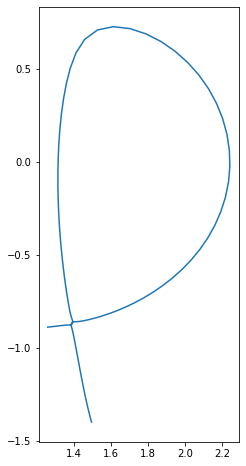

In [160]:
plt.figure(figsize=(8, 8))

plt.axes().set_aspect('equal')
rad_index = 18
plt.plot(al_new_mesh_x_cen[rad_index,:], al_new_mesh_y_cen[rad_index,:])
x = al_new_mesh_x_cen[19,77]
y = al_new_mesh_y_cen[19,77]
#plt.plot(x, y, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="white")

plt.show()

<b><span style="color:white; font-size:150%">Heat Flux Comparison </span></b>
  

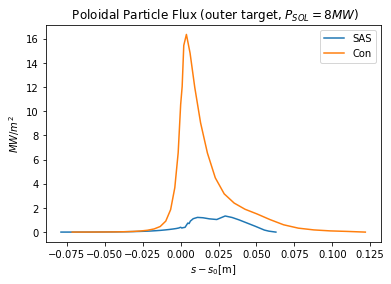

In [161]:
plt.title(r" Poloidal Particle Flux (outer target, $P_{SOL} = 8MW$)")
plt.plot(al_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_al_8MW_Ne_0[0,1:,96]/(1000000*al_newmesh_facing[0,1:,96]), label = r"SAS")
plt.plot(co_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_co_8MW_Ne_0[0,1:,96]/(1000000*co_newmesh_facing[0,1:,96]), label = r"Con")

plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()
plt.savefig("./New_plots/SAS Con Ne0 8MW.png")


plt.show()

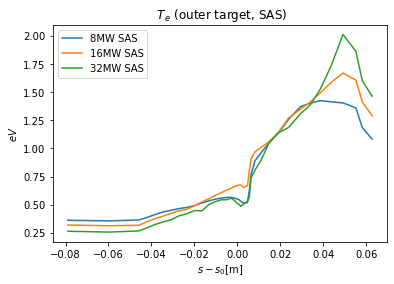

In [162]:
plt.title(r" $T_e$ (outer target, SAS)")
plt.plot(al_new_mesh_sep_out_target_dist[1:], te_b2fplasmf_al_8MW_Ne_0[1:,96]/(eV), label = r"8MW SAS")
plt.plot(al_new_mesh_sep_out_target_dist[1:], te_b2fplasmf_al_16MW_Ne_0[1:,96]/(eV), label = r"16MW SAS")
plt.plot(al_new_mesh_sep_out_target_dist[1:], te_b2fplasmf_al_32MW_Ne_0[1:,96]/(eV), label = r"32MW SAS")

#plt.plot(co_new_mesh_sep_out_target_dist[1:], te_b2fplasmf_co_8MW_Ne_0[1:,96]/(eV), label = r"SAS")

plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$eV$')
plt.legend()


plt.show()

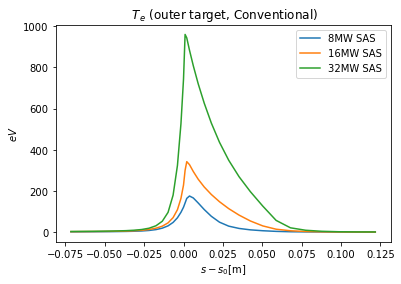

In [163]:
plt.title(r" $T_e$ (outer target, Conventional)")
plt.plot(co_new_mesh_sep_out_target_dist[1:], te_b2fplasmf_co_8MW_Ne_0[1:,96]/(eV), label = r"8MW SAS")
plt.plot(co_new_mesh_sep_out_target_dist[1:], te_b2fplasmf_co_16MW_Ne_0[1:,96]/(eV), label = r"16MW SAS")
plt.plot(co_new_mesh_sep_out_target_dist[1:], te_b2fplasmf_co_32MW_Ne_0[1:,96]/(eV), label = r"32MW SAS")

#plt.plot(co_new_mesh_sep_out_target_dist[1:], te_b2fplasmf_co_8MW_Ne_0[1:,96]/(eV), label = r"SAS")

plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$eV$')
plt.legend()


plt.show()

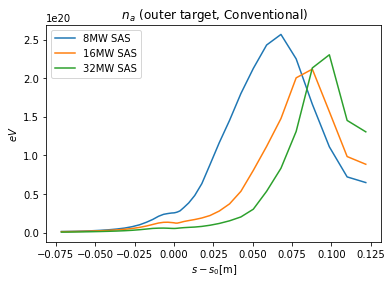

In [164]:
plt.title(r" $n_a$ (outer target, Conventional)")
plt.plot(co_new_mesh_sep_out_target_dist[1:], np.sum(na_b2fplasmf_co_8MW_Ne_0,axis = 0)[1:,96], label = r"8MW SAS")
plt.plot(co_new_mesh_sep_out_target_dist[1:], np.sum(na_b2fplasmf_co_16MW_Ne_0, axis = 0)[1:,96], label = r"16MW SAS")
plt.plot(co_new_mesh_sep_out_target_dist[1:], np.sum(na_b2fplasmf_co_32MW_Ne_0, axis = 0)[1:,96], label = r"32MW SAS")

#plt.plot(co_new_mesh_sep_out_target_dist[1:], te_b2fplasmf_co_8MW_Ne_0[1:,96]/(eV), label = r"SAS")

plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$eV$')
plt.legend()



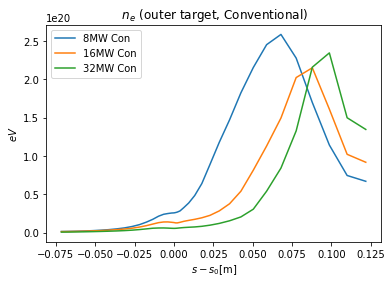

In [165]:
plt.title(r" $n_e$ (outer target, Conventional)")
plt.plot(co_new_mesh_sep_out_target_dist[1:], ne_b2fplasmf_co_8MW_Ne_0[1:,96], label = r"8MW Con")
plt.plot(co_new_mesh_sep_out_target_dist[1:], ne_b2fplasmf_co_16MW_Ne_0[1:,96], label = r"16MW Con")
plt.plot(co_new_mesh_sep_out_target_dist[1:], ne_b2fplasmf_co_32MW_Ne_0[1:,96], label = r"32MW Con")

#plt.plot(co_new_mesh_sep_out_target_dist[1:], te_b2fplasmf_co_8MW_Ne_0[1:,96]/(eV), label = r"SAS")

plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$eV$')
plt.legend()


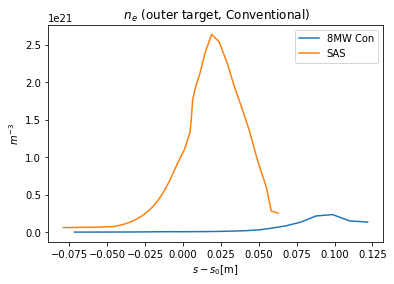

In [166]:
plt.title(r" $n_e$ (outer target, Conventional)")
plt.plot(co_new_mesh_sep_out_target_dist[1:], ne_b2fplasmf_co_32MW_Ne_0[1:,96], label = r"8MW Con")
plt.plot(al_new_mesh_sep_out_target_dist[1:], ne_b2fplasmf_al_32MW_Ne_0[1:,96], label = r"SAS")

#plt.plot(co_new_mesh_sep_out_target_dist[1:], te_b2fplasmf_co_8MW_Ne_0[1:,96]/(eV), label = r"SAS")

plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$m^{-3}$')
plt.legend()

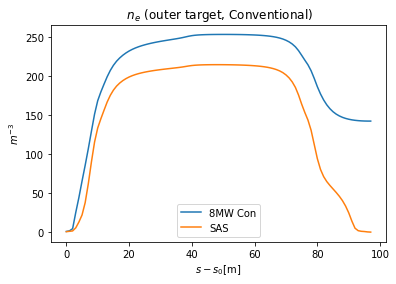

In [167]:
plt.title(r" $n_e$ (outer target, Conventional)")
plt.plot(te_b2fplasmf_co_8MW_Ne_0[19,:]/eV, label = r"8MW Con")
plt.plot(te_b2fplasmf_al_8MW_Ne_0[19,:]/eV, label = r"SAS")

#plt.plot(co_new_mesh_sep_out_target_dist[1:], te_b2fplasmf_co_8MW_Ne_0[1:,96]/(eV), label = r"SAS")

plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$m^{-3}$')
plt.legend()

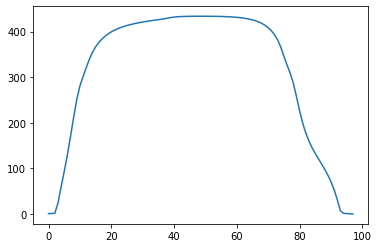

In [168]:
plt.plot(te_b2fplasmf_al_32MW_Ne_0[19,:]/eV)

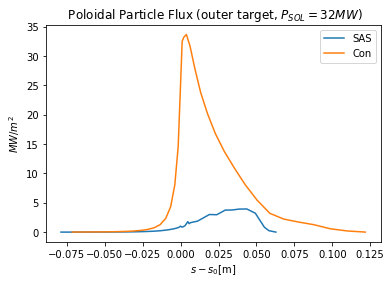

In [169]:
plt.title(r" Poloidal Particle Flux (outer target, $P_{SOL} = 32MW$)")
plt.plot(al_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_al_32MW_Ne_0[0,1:,96]/(1000000*al_newmesh_facing[0,1:,96]), label = r"SAS")
plt.plot(co_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_co_32MW_Ne_0[0,1:,96]/(1000000*co_newmesh_facing[0,1:,96]), label = r"Con")

plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()
plt.savefig("./New_plots/SAS Con Ne0 32MW.png")


plt.show()

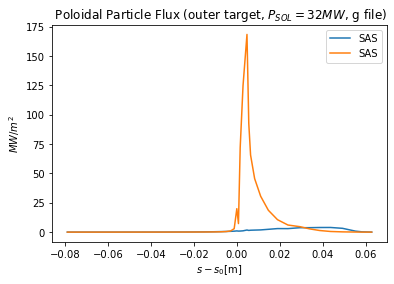

In [170]:
plt.title(r" Poloidal Particle Flux (outer target, $P_{SOL} = 32MW$, g file)")
plt.plot(al_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_al_32MW_Ne_0[0,1:,96]/(1000000*al_newmesh_facing[0,1:,96]), label = r"SAS")
plt.plot(al_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_al_ng_32MW_Ne_0[0,1:,96]/(1000000*al_newmesh_facing[0,1:,96]), label = r"SAS")

plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()
plt.savefig("./New_plots/SAS Con Ne0 32MW.png")


plt.show()

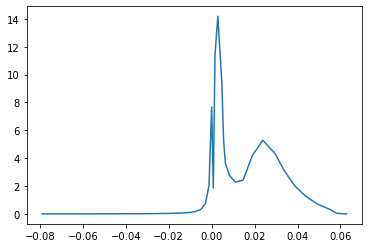

In [171]:
plt.plot(al_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_ng_32MW_Ne_0[0,1:,1]/(1000000*al_newmesh_facing[0,1:,1])), label = r" 32MW")


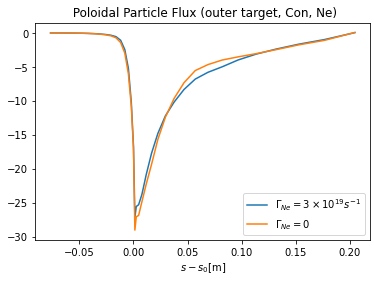

In [172]:
plt.title(r" Poloidal Particle Flux (outer target, Con, Ne)")
plt.plot(co_new_mesh_sep_in_target_dist[1:], fht_b2fplasmf_co_32MW_Ne_0[0,1:,1]/(1000000*co_newmesh_facing[0,1:,1]), label = r"$\Gamma_{Ne} = 3 \times 10^{19} s^{-1}$")
plt.plot(co_new_mesh_sep_in_target_dist[1:], fht_b2fplasmf_co_32MW_Ne_3e19[0,1:,1]/(1000000*co_newmesh_facing[0,1:,1]), label = r"$\Gamma_{Ne} = 0$")

plt.xlabel(r'$s-s_0$[m]')
#plt.ylabel(r'$MW/m^2$')
plt.legend()
#plt.savefig("SAS heat flux w.r.t impurity.png")


plt.show()

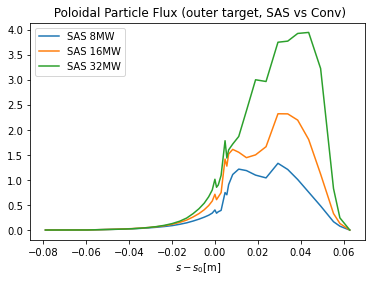

In [173]:
plt.title(r" Poloidal Particle Flux (outer target, SAS vs Conv)")
plt.plot(al_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_al_8MW_Ne_0[0,1:,96]/(1000000*al_newmesh_facing[0,1:,96]), label = r"SAS 8MW")
plt.plot(al_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_al_16MW_Ne_0[0,1:,96]/(1000000*al_newmesh_facing[0,1:,96]), label = r"SAS 16MW")
plt.plot(al_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_al_32MW_Ne_0[0,1:,96]/(1000000*al_newmesh_facing[0,1:,96]), label = r"SAS 32MW")

plt.xlabel(r'$s-s_0$[m]')
#plt.ylabel(r'$MW/m^2$')
plt.legend()
#plt.savefig("SAS heat flux w.r.t impurity.png")


plt.show()

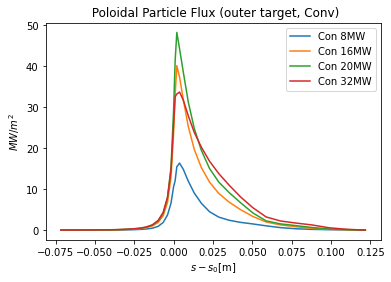

In [174]:
plt.title(r" Poloidal Particle Flux (outer target, Conv)")
plt.plot(co_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_co_8MW_Ne_0[0,1:,96]/(1000000*co_newmesh_facing[0,1:,96]), label = r"Con 8MW")
plt.plot(co_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_co_16MW_Ne_0[0,1:,96]/(1000000*co_newmesh_facing[0,1:,96]), label = r"Con 16MW")
plt.plot(co_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_co_24MW_Ne_0[0,1:,96]/(1000000*co_newmesh_facing[0,1:,96]), label = r"Con 20MW")
plt.plot(co_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_co_32MW_Ne_0[0,1:,96]/(1000000*co_newmesh_facing[0,1:,96]), label = r"Con 32MW")


plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()
plt.savefig("./New_plots/Con outer Ne0 8~32MW.png")


plt.show()

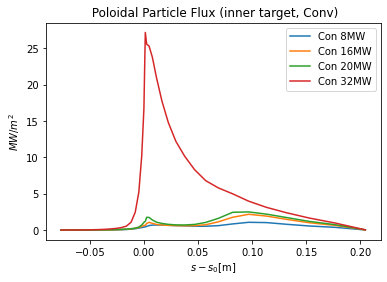

In [175]:
plt.title(r" Poloidal Particle Flux (inner target, Conv)")
plt.plot(co_new_mesh_sep_in_target_dist[1:], np.abs(fht_b2fplasmf_co_8MW_Ne_0[0,1:,1]/(1000000*co_newmesh_facing[0,1:,1])), label = r"Con 8MW")
plt.plot(co_new_mesh_sep_in_target_dist[1:], np.abs(fht_b2fplasmf_co_16MW_Ne_0[0,1:,1]/(1000000*co_newmesh_facing[0,1:,1])), label = r"Con 16MW")
plt.plot(co_new_mesh_sep_in_target_dist[1:], np.abs(fht_b2fplasmf_co_24MW_Ne_0[0,1:,1]/(1000000*co_newmesh_facing[0,1:,1])), label = r"Con 20MW")
plt.plot(co_new_mesh_sep_in_target_dist[1:], np.abs(fht_b2fplasmf_co_32MW_Ne_0[0,1:,1]/(1000000*co_newmesh_facing[0,1:,1])), label = r"Con 32MW")
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()
plt.savefig("./New_plots/Con inner Ne0 8~32MW.png")


plt.show()

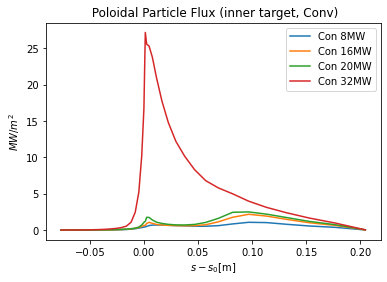

In [176]:
plt.title(r" Poloidal Particle Flux (inner target, Conv)")
plt.plot(co_new_mesh_sep_in_target_dist[1:], np.abs(fht_b2fplasmf_co_8MW_Ne_0[0,1:,1]/(1000000*co_newmesh_facing[0,1:,1])), label = r"Con 8MW")
plt.plot(co_new_mesh_sep_in_target_dist[1:], np.abs(fht_b2fplasmf_co_16MW_Ne_0[0,1:,1]/(1000000*co_newmesh_facing[0,1:,1])), label = r"Con 16MW")
plt.plot(co_new_mesh_sep_in_target_dist[1:], np.abs(fht_b2fplasmf_co_24MW_Ne_0[0,1:,1]/(1000000*co_newmesh_facing[0,1:,1])), label = r"Con 20MW")
plt.plot(co_new_mesh_sep_in_target_dist[1:], np.abs(fht_b2fplasmf_co_32MW_Ne_0[0,1:,1]/(1000000*co_newmesh_facing[0,1:,1])), label = r"Con 32MW")

plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()
#plt.savefig("SAS heat flux w.r.t impurity.png")


plt.show()

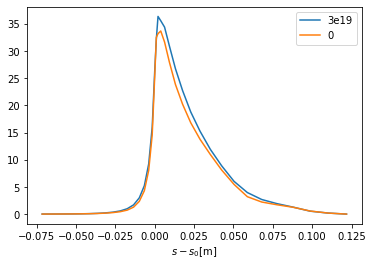

In [177]:
plt.plot(co_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_co_32MW_Ne_3e19[0,1:,96]/(1000000*co_newmesh_facing[0,1:,96]), label = r"3e19")
plt.plot(co_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_co_32MW_Ne_0[0,1:,96]/(1000000*co_newmesh_facing[0,1:,96]), label = r"0")

plt.xlabel(r'$s-s_0$[m]')
#plt.ylabel(r'$MW/m^2$')
plt.legend()
#plt.savefig("SAS heat flux w.r.t impurity.png")


plt.show()

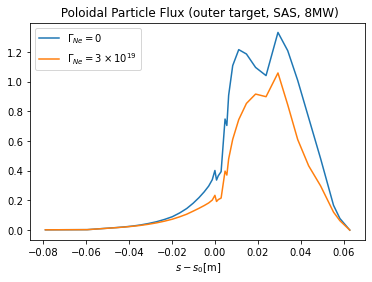

In [178]:
plt.title(r" Poloidal Particle Flux (outer target, SAS, 8MW)")
plt.plot(al_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_al_8MW_Ne_0[0,1:,96]/(1000000*al_newmesh_facing[0,1:,96]), label = r"$\Gamma_{Ne} = 0$")
plt.plot(al_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_al_8MW_Ne_3e19[0,1:,96]/(1000000*al_newmesh_facing[0,1:,96]), label = r"$\Gamma_{Ne} = 3\times 10^{19}$")

plt.xlabel(r'$s-s_0$[m]')
#plt.ylabel(r'$MW/m^2$')
plt.legend()
#plt.savefig("SAS heat flux w.r.t impurity.png")


plt.show()

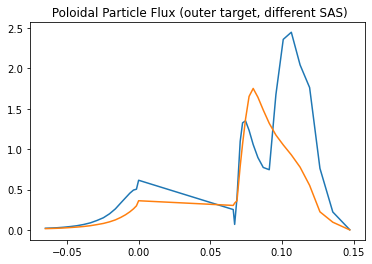

In [179]:
plt.title(r" Poloidal Particle Flux (outer target, different SAS)")
plt.plot(newSAS_sep_out_target_dist[1:], fht_b2fplasmf_New_al_32MW_Ne_0[0,1:,96]/(1000000*newSAS_facing[0,1:,96]), label = r"New SAS 32MW")
plt.plot(newSAS_sep_out_target_dist[1:], fht_b2fplasmf_New_al_8MW_Ne_0[0,1:,96]/(1000000*newSAS_facing[0,1:,96]), label = r"New SAS 8MW")

plt.show()

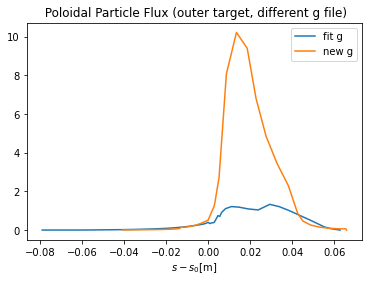

In [180]:
plt.title(r" Poloidal Particle Flux (outer target, different g file)")
plt.plot(al_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_al_8MW_Ne_0[0,1:,96]/(1000000*al_newmesh_facing[0,1:,96]), label = r"fit g")
plt.plot(al_new_g_sep_out_target_dist[1:], fht_b2fplasmf_al_ng_8MW_Ne_0[0,1:,96]/(1000000*al_newg_newmesh_facing[0,1:,96]), label = r"new g")

plt.xlabel(r'$s-s_0$[m]')
#plt.ylabel(r'$MW/m^2$')
plt.legend()
#plt.savefig("SAS heat flux w.r.t impurity.png")


plt.show()

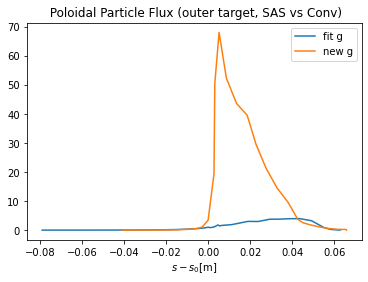

In [181]:
plt.title(r" Poloidal Particle Flux (outer target, SAS vs Conv)")
plt.plot(al_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_al_32MW_Ne_0[0,1:,96]/(1000000*al_newmesh_facing[0,1:,96]), label = r"fit g")
plt.plot(al_new_g_sep_out_target_dist[1:], fht_b2fplasmf_al_ng_32MW_Ne_0[0,1:,96]/(1000000*al_newg_newmesh_facing[0,1:,96]), label = r"new g")

plt.xlabel(r'$s-s_0$[m]')
#plt.ylabel(r'$MW/m^2$')
plt.legend()
#plt.savefig("SAS heat flux w.r.t impurity.png")


plt.show()

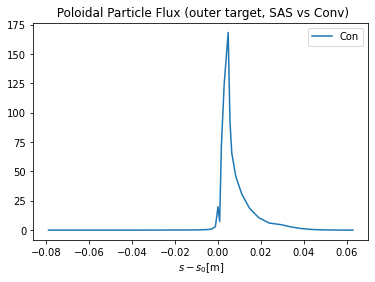

In [182]:
plt.title(r" Poloidal Particle Flux (outer target, SAS vs Conv)")
#plt.plot(al_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_al_32MW_Ne_0[0,1:,96]/(1000000*al_newmesh_facing[0,1:,96]), label = r"SAS")
plt.plot(al_new_mesh_sep_out_target_dist[1:], fht_b2fplasmf_al_ng_32MW_Ne_0[0,1:,96]/(1000000*al_newmesh_facing[0,1:,96]), label = r"Con")

plt.xlabel(r'$s-s_0$[m]')
#plt.ylabel(r'$MW/m^2$')
plt.legend()
#plt.savefig("SAS heat flux w.r.t impurity.png")


plt.show()

(38, 98)


/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_19885/509427164.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fort_rad =  np.abs(fort.eir_spec("./data_Heating_Geo","SAS_8MW_noNe"))


NameError: name 'rqrad_b2fplasmf_new_mesh_al_8MW_Ne_0' is not defined

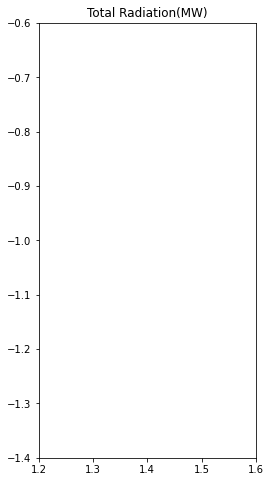

In [183]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("Total Radiation(MW)")
plt.xlim(1.2,1.6)
plt.ylim(-1.4,-0.6)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
fort_rad =  np.abs(fort.eir_spec("./data_Heating_Geo","SAS_8MW_noNe"))
fort_rad_total = np.sum(fort_rad[0],axis = 0) + fort_rad[1] + fort_rad[2]
total_rad = np.sum(rqrad_b2fplasmf_new_mesh_al_8MW_Ne_0, axis=0)
real_total_rad= np.abs(fort_rad_total+total_rad)
plt.pcolormesh(al_new_mesh_x_cen, al_new_mesh_y_cen, real_total_rad)#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]

plt.colorbar()

plt.show()


In [ ]:
plt.plot(ne_b2fplasmf_new_mesh_al_8MW_Ne_0[18,:])

In [ ]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title(r"$T_e$")
plt.xlim(1.2,1.6)
plt.ylim(-1.4,-0.2)

plt.pcolormesh(al_new_mesh_x_cen, al_new_mesh_y_cen, te_b2fplasmf_new_mesh_al_32MW_Ne_0/eV)#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]

plt.colorbar()

plt.show()


In [ ]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title(r"$T_e$")
plt.xlim(1.2,1.6)
plt.ylim(-1.4,-0.2)

plt.pcolormesh(co_new_mesh_x_cen, co_new_mesh_y_cen, te_b2fplasmf_new_mesh_co_32MW_Ne_0/eV)#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]

plt.colorbar()

plt.show()


In [ ]:
plt.plot(Mesh_data.al_Xpt_dist, np.log(ne_b2fplasmf_new_mesh_al_32MW_Ne_0[18,78:]),label = 'SAS')
plt.plot(Mesh_data.conv_Xpt_dist, np.log(ne_b2fplasmf_new_mesh_co_32MW_Ne_0[18,78:]),label = 'conventional')
plt.legend()
plt.title(r"$n_e$ from X-point(32MW, $\Gamma_{Ne} = 3 \times 10^{19}s^{-1})$")

plt.show()

In [ ]:
plt.plot(Mesh_data.al_Xpt_dist, te_b2fplasmf_new_mesh_co_32MW_Ne_0[18,78:]/eV,label = 'con')
plt.plot(Mesh_data.al_Xpt_dist, te_b2fplasmf_new_mesh_al_32MW_Ne_0[18,78:]/eV,label = 'SAS')

#plt.plot(Mesh_data.conv_Xpt_dist, te_b2fplasmf_new_mesh_co_32MW_Ne_0[18,78:]/eV,label = 'conventional')
plt.legend()
plt.title(r"$T_e$ from X-point(8MW, $\Gamma_{Ne} = 0$)")


In [ ]:
plt.plot(Mesh_data.al_Xpt_dist, te_b2fplasmf_new_mesh_al_32MW_Ne_3e19[18,78:]/eV,label = '3e19')
plt.plot(Mesh_data.al_Xpt_dist, te_b2fplasmf_new_mesh_al_32MW_Ne_0[18,78:]/eV,label = '0')

#plt.plot(Mesh_data.conv_Xpt_dist, te_b2fplasmf_new_mesh_co_32MW_Ne_0[18,78:]/eV,label = 'conventional')
plt.legend()
plt.title(r"$T_e$ from X-point(8MW, $\Gamma_{Ne} = 0$)")

plt.show()

In [ ]:
te_b2fplasmf_new_mesh_al_8MW_Ne_0[18,78:]/eV

In [ ]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("Electric potential")
#plt.xlim(1.4,1.6)
#plt.ylim(-1.4,-1.2)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
plt.pcolormesh(co_new_mesh_x_cen, co_new_mesh_y_cen,fht_b2fplasmf_new_mesh_co_16MW_Ne_0[0,:,:] )#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]

plt.colorbar()

plt.show()


In [ ]:
a = fort.eir("./data_Heating_Geo","SAS_32MW_noNe")
b = fort.eir("./data_Heating_Geo","SAS_32MW_Ne_3e19")

print(a, np.sum(rqrad_b2fplasmf_new_mesh_al_32MW_Ne_0), np.sum(rqrad_b2fplasmf_new_mesh_al_32MW_Ne_0))
print(b, np.sum(rqrad_b2fplasmf_new_mesh_al_32MW_Ne_3e19),np.sum(rqrad_b2fplasmf_new_mesh_al_32MW_Ne_3e19))

In [ ]:
print(fort.eir("./data_Heating_Geo","co_8MW_noNe"))
print(fort.eir("./data_Heating_Geo","co_16MW_noNe"))
print(fort.eir("./data_Heating_Geo","co_32MW_noNe"))


In [ ]:
print(fort.eir("./data_Heating_Geo","SAS_8MW_noNe"))
print(fort.eir("./data_Heating_Geo","SAS_16MW_noNe"))
print(fort.eir("./data_Heating_Geo","SAS_32MW_noNe"))


In [ ]:
density_a = np.load("./data_Heating_Geo/na_b2fplasmf_SAS_8MW_noNe.npy")
density_c = np.load("./data_Heating_Geo/na_b2fplasmf_Co_8MW_noNe.npy")

vol_a = np.load("./../vol_b2fplasmf_al_KSTAR_noNe.npy")
vol_c = np.load("./../vol_b2fplasmf_co_KSTAR_noNe.npy")


numbe_a = np.zeros([20,38,98])
numbe_c = np.zeros([20,38,98])

for i in range(20):
    numbe_a[i,:,:] = density_a[i,:,:]*vol_a[:,:] 
    numbe_c[i,:,:] = density_c[i,:,:]*vol_c[:,:] 
     

In [ ]:
print(al_newmesh_facing[0,1:,96])

In [ ]:
plt.title(r" Poloidal Heat Flux (outer target, SAS, puff rate")
plt.plot(al_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_mesh_al_32MW_Ne_0[0,1:,96])/(al_newmesh_facing[0,1:,96]*1000000), label = r"No puff")
plt.plot(al_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_mesh_al_32MW_Ne_3e19[0,1:,96])/(al_newmesh_facing[0,1:,96]*1000000), label = r"$3 \times 10^{19}$")
plt.legend()
plt.show()

In [ ]:
plt.title(r" Poloidal Heat Flux (outer target, SAS, puff rate")

plt.plot(al_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_mesh_al_32MW_Ne_0[0,1:,96])/(al_newmesh_facing[0,1:,96]*1000000), label = r"No puff")
plt.plot(al_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_mesh_al_8MW_Ne_0[0,1:,96])/(al_newmesh_facing[0,1:,96]*1000000), label = r"$3 \times 10^{19}$")
plt.legend()
plt.show()

In [ ]:
plt.title("New g file(SAS, 8MW)")
plt.plot(al_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_mesh_al_8MW_Ne_0[0,1:,96])/(al_newmesh_facing[0,1:,96]*1000000), label = r"original gfile")
plt.plot(al_new_g_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_g_al_8MW_Ne_0[0,1:,96])/(al_new_g_facing[0,1:,96]*1000000), label = r"new g file")
plt.plot(co_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_mesh_co_8MW_Ne_0[0,1:,96])/(co_newmesh_facing[0,1:,96]*1000000),label = "Conventional")
plt.legend()


In [ ]:
plt.title(r" Poloidal Heat Flux (outer target, SAS)")
fht_b2fplasmf_new_mesh_al_8MW_Ne_3e19_Re = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_SAS_8MW_Ne_3e19_re.npy")
plt.plot(al_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_mesh_al_8MW_Ne_3e19[0,1:,96])/(al_newmesh_facing[0,1:,96]*1000000) ,label = r"8MW")
plt.plot(al_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_mesh_al_8MW_Ne_3e19_Re[0,1:,96])/(al_newmesh_facing[0,1:,96]*1000000) ,label = r"8MW")


plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()
plt.savefig("./Plots/SAS heat flux w.r.t Heating.png")


plt.show()

In [ ]:
plt.title(r" Poloidal Heat Flux (outer target, SAS)")
fht_b2fplasmf_new_mesh_co_32MW_Ne_e19_Re = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_co_32MW_Ne_e19.npy")

fht_b2fplasmf_new_mesh_co_8MW_Ne_3e19_Re = np.load("./data_Heating_Geo_sput/fht_b2fplasmf_co_8MW_Ne_e19.npy")
#plt.plot(al_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_mesh_co_32MW_Ne_3e19[0,1:,96])/(co_newmesh_facing[0,1:,96]*1000000) ,label = r"8MW")
#plt.plot(co_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_mesh_co_32MW_Ne_e19_Re[0,1:,96])/(co_newmesh_facing[0,1:,96]*1000000) ,label = r"8MW")
plt.plot(co_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_mesh_co_8MW_Ne_3e19_Re[0,1:,96])/(co_newmesh_facing[0,1:,96]*1000000) ,label = r"8MW")
plt.plot(co_new_mesh_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_new_mesh_co_8MW_Ne_3e19[0,1:,96])/(co_newmesh_facing[0,1:,96]*1000000) ,label = r"8MW")


plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()
plt.savefig("./Plots/SAS heat flux w.r.t Heating.png")


plt.show()

In [ ]:
te_b2fplasmf_new_mesh_co_32MW_Ne_3e19_Re = np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_32MW_Ne_e19.npy")
te_b2fplasmf_new_mesh_co_8MW_Ne_3e19_Re = np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_8MW_Ne_e19.npy")
plt.plot(co_new_mesh_sep_out_target_dist[1:], np.abs(te_b2fplasmf_new_mesh_co_32MW_Ne_3e19_Re[1:,96])/(co_newmesh_facing[0,1:,96]*eV) ,label = r"8MW")
plt.plot(co_new_mesh_sep_out_target_dist[1:], np.abs(te_b2fplasmf_new_mesh_co_8MW_Ne_3e19_Re[1:,96])/(co_newmesh_facing[0,1:,96]*eV) ,label = r"8MW")


In [ ]:
te_b2fplasmf_new_mesh_al_32MW_Ne_3e19_Re = np.load("./data_Heating_Geo_sput/te_b2fplasmf_SAS")
te_b2fplasmf_new_mesh_al_8MW_Ne_3e19_Re = np.load("./data_Heating_Geo_sput/te_b2fplasmf_SAS_8MW_Ne_3e19_re.npy")
plt.plot(al_new_mesh_sep_out_target_dist[1:], np.abs(te_b2fplasmf_new_mesh_al_32MW_Ne_3e19_Re[1:,96])/(al_newmesh_facing[0,1:,96]*eV) ,label = r"8MW")
plt.plot(al_new_mesh_sep_out_target_dist[1:], np.abs(te_b2fplasmf_new_mesh_al_8MW_Ne_3e19_Re[1:,96])/(al_newmesh_facing[0,1:,96]*eV) ,label = r"8MW")


In [ ]:
plt.title(r" Poloidal Heat Flux (outer target, SAS)")
te_b2fplasmf_new_mesh_al_32MW_Ne_3e19_Re = np.load("./data_Heating_Geo_sput/te_b2fplasmf_SAS_32MW_Ne_0_re.npy")
te_b2fplasmf_new_mesh_co_32MW_Ne_3e19_Re  = np.load("./data_Heating_Geo_sput/te_b2fplasmf_co_32MW_Ne_e19.npy")

#plt.plot(te_b2fplasmf_new_mesh_al_32MW_Ne_3e19_Re[18,:]/eV ,label = r"old")
plt.plot(te_b2fplasmf_new_mesh_co_32MW_Ne_3e19_Re[18,:]/eV ,label = r"new")


plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()
plt.savefig("./Plots/SAS heat flux w.r.t Heating.png")


plt.show()